In [1]:
%matplotlib inline
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

In [2]:
i1 = cv2.imread('h1.jpg',cv2.IMREAD_COLOR)
i2 = cv2.imread('h2.jpg',cv2.IMREAD_COLOR)

In [2]:
def click(event, x, y, flags, points):
    if event == cv2.EVENT_LBUTTONDOWN:
        if len(points) < 4:
            cv2.circle(img, (x,y), 2, (0, 0, 255), 2)
            cv2.putText(img, str(x) + ',' + str(y), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            cv2.imshow('image', img)
            points.append([y, x])

In [4]:
points1 = []
img = np.copy(i1)
cv2.imshow('image', img)
cv2.setMouseCallback('image', click, points1)
cv2.waitKey(0)
cv2.destroyAllWindows()

points1 = np.asarray(points1, dtype=np.float32)
print(points1)

[[243. 243.]
 [242. 963.]
 [966. 242.]
 [968. 964.]]


In [5]:
points2 = []
img = np.copy(i2)
cv2.imshow('image', img)
cv2.setMouseCallback('image', click, points2)
cv2.waitKey(0)
cv2.destroyAllWindows()

points2 = np.asarray(points2, dtype=np.float32)
print(points2)

[[227. 215.]
 [119. 447.]
 [395. 397.]
 [270. 634.]]


In [3]:
def matrixH(A, B):
    temp = np.zeros([8,9])
    for i in range(4):
        x1 = A[i][0]
        y1 = A[i][1]
        x2 = B[i][0]
        y2 = B[i][1]
        temp[2*i][:] = [x1,y1,1,0,0,0,-x2*x1,-x2*y1,-x2]
        temp[2*i+1][:] = [0,0,0,x1,y1,1,-y2*x1,-y2*y1,-y2]
        
        
    u,d,vt = linalg.svd(temp)
    v = vt[-1,:]
    v = v / v[-1]
    v = np.reshape(v, newshape=(3, 3))
    
    return v/v[2,2]

In [7]:
H = matrixH(points1,points2)
print(H)

[[ 1.97142230e-01 -1.39411219e-01  2.12839030e+02]
 [ 2.17009813e-01  3.60753465e-01  7.44781849e+01]
 [-8.82221305e-05  8.58230754e-05  1.00000000e+00]]


In [4]:
def transform(img1, H, img2):
    result = np.zeros([img2.shape[0], img2.shape[1], img2.shape[2]])
    H1 = img1.shape[0]
    W1 = img1.shape[1]
    H2 = img2.shape[0]
    W2 = img2.shape[1]
    i = 0
    while i < H1:
        j = 0
        while j < W1:
            dim = (H[2][0]*i + H[2][1]*j + H[2][2])
            xresult = (H[0][0]*i + H[0][1]*j + H[0][2]) / dim
            yresult = (H[1][0]*i + H[1][1]*j + H[1][2]) / dim
            if int(xresult) < H2 and int(yresult) < W2:
                result[int(xresult)][int(yresult)] = img1[int(i)][int(j)]
            j = j+1
        i = i+1
    return result

In [9]:
print(i2.shape)

(587, 850, 3)


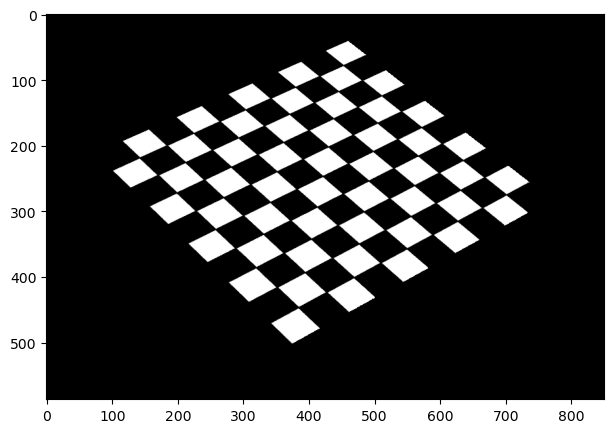

In [10]:
persImg1 = transform(i1, H, i2)
plt.figure(figsize=(10,5))
plt.imshow(persImg1.astype('uint8'))
plt.show()

In [11]:
H2 = linalg.inv(H)
print(H2)

[[ 3.17053345e+00  1.41076967e+00 -7.79884829e+02]
 [-2.00041263e+00  1.93186750e+00  2.81883898e+02]
 [ 4.51392780e-04 -4.13377041e-05  9.07004756e-01]]


In [16]:
def transform2(img1, H, img2):
    result = np.zeros([img2.shape[0]+500, img2.shape[1]+500, img2.shape[2]])
    H1 = img1.shape[0]
    W1 = img1.shape[1]
    H2 = img2.shape[0]
    W2 = img2.shape[1]
    i = 0
    while i < H1:
        j = 0
        while j < W1:
            dim = (H[2][0]*i + H[2][1]*j + H[2][2])
            xresult = (H[0][0]*i + H[0][1]*j + H[0][2]) / dim
            yresult = (H[1][0]*i + H[1][1]*j + H[1][2]) / dim
            if int(xresult) < H2 and int(yresult) < W2:
                result[int(xresult)][int(yresult)] = img1[int(i)][int(j)]
            j = j+0.1
        i = i+0.1
    return result

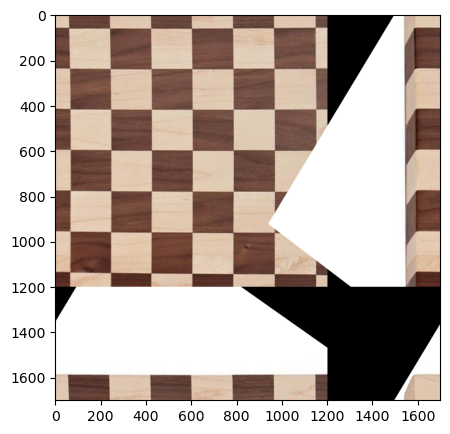

In [17]:
persImg1 = transform2(i2, H2, i1)
plt.figure(figsize=(10,5))
plt.imshow(persImg1.astype('uint8'))
plt.show()

In [106]:
print(i2.shape)

(587, 850, 3)


In [6]:
sim = cv2.imread('simpsons.jpg',cv2.IMREAD_COLOR)
bus = cv2.imread('bus.jpg',cv2.IMREAD_COLOR)

In [7]:
points3 = []
img = np.copy(sim)
cv2.imshow('image', img)
cv2.setMouseCallback('image', click, points3)
cv2.waitKey(0)
cv2.destroyAllWindows()

points1 = np.asarray(points3, dtype=np.float32)
print(points3)

[[16, 8], [19, 980], [1469, 25], [1454, 976]]


In [8]:
points4 = []
img = np.copy(bus)
cv2.imshow('image', img)
cv2.setMouseCallback('image', click, points4)
cv2.waitKey(0)
cv2.destroyAllWindows()

points2 = np.asarray(points4, dtype=np.float32)
print(points4)

[[212, 584], [232, 796], [520, 598], [471, 806]]


In [9]:
HH = matrixH(points3,points4)
print(HH)

[[ 2.05497459e-01  8.54000882e-02  2.08457410e+02]
 [-2.32154970e-03  4.43001729e-01  5.81673720e+02]
 [-1.46593628e-05  2.82013401e-04  1.00000000e+00]]


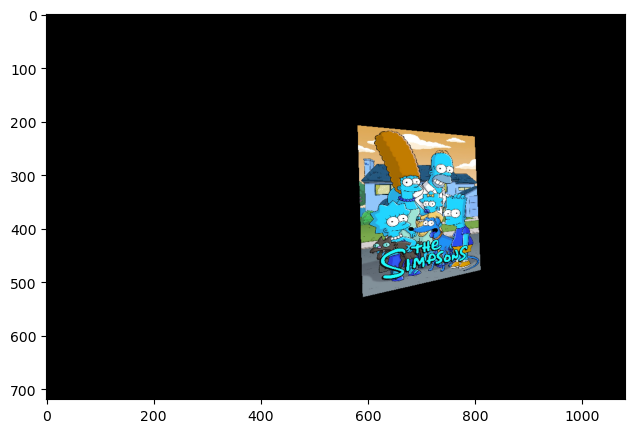

In [18]:
result = transform(sim, HH, bus)
plt.figure(figsize=(10,5))
plt.imshow(result.astype('uint8'))
plt.show()

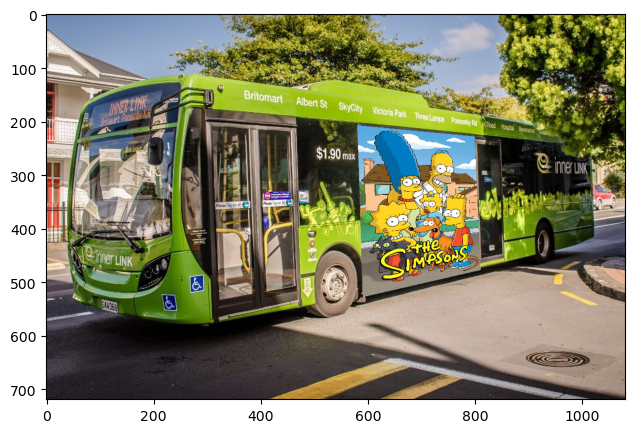

In [21]:
for i in range(0, bus.shape[0]):
    for j in range(0, bus.shape[1]):
        if all(result[i][j] == (0, 0, 0)):
            bus[i][j] = bus[i][j]
        else:
            bus[i][j] = result[i][j]

plt.figure(figsize=(10,5))
bus = cv2.cvtColor(bus, cv2.COLOR_BGR2RGB)
plt.imshow(bus.astype('uint8'))
plt.show()